# Data Madness
## Focus on Netherlands Data

Jupyter Notebook used to clean and compare CO2 gas emissions of The Netherlands and Maastricht.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Maastricht Data

**Data Cleaning:**

  - Drop Columns containing NaN Values
  - Drop Columns that are irrelevant to the analysis (climate-related hazards)
  - Columns that contain pollutants other than CO2 (the only pollutant stored in the Maastricht Data)
    
**EDA:**

  - Line Plot of mean CO2 emissions

In [2]:
# Load Data
pollutants_data = pd.read_csv('final_data_merged.csv')
pollutants_data['Year'] = pollutants_data['Year'].astype('int')
pollutants_data.head()

,Country,Year,Carbon Monoxide Agriculture,Carbon Monoxide Combustion,Carbon Monoxide Industrial combustion,Carbon Monoxide Industrial processes and product use,Carbon Monoxide Miscellaneous,Carbon Monoxide Other Mobile Sources,Carbon Monoxide Other combustion,Carbon Monoxide Power stations,...,Sulphur Oxides Total emissions per capita,"Sulphur Oxides Total emissions per unit of GDP, Kg per 1000 USD","Sulphur Oxides Total emissions, Index 1990 = 100","Sulphur Oxides Total emissions, Index 2000 = 100",Sulphur Oxides Total man-made emissions,Sulphur Oxides Waste,drought,flood,wildfire,wind
0,Australia,2001,538.311,1029.561,192.755,10.632,19.592,352.097,836.806,66.477,...,134.084,3.442,163.037,110.329,2584.435,0.0,-1.555795,0.925584,900401.4277,76.026778
1,Australia,2002,554.604,896.946,203.296,10.355,17.358,359.073,693.650,72.754,...,142.335,3.584,175.049,118.458,2774.853,0.0,-30.560191,0.925584,761169.0155,76.355006
2,Australia,2003,261.322,946.955,227.666,12.087,14.877,367.011,719.290,68.788,...,140.692,3.439,175.030,118.445,2774.556,0.0,-6.096639,0.925584,374209.8141,76.900698
3,Australia,2004,536.804,934.548,236.890,12.641,14.909,380.858,697.658,77.134,...,126.039,3.019,158.486,107.250,2512.307,0.0,-7.528358,0.925584,607280.0186,77.029780
4,Australia,2005,355.032,929.549,256.683,10.042,14.097,394.103,672.867,85.404,...,124.902,2.948,158.980,107.584,2520.124,0.0,-9.605953,0.925584,302423.1314,76.847153


In [3]:
netherlands_data = pollutants_data.loc[pollutants_data['Country'] == 'Netherlands']
netherlands_data = netherlands_data.reset_index(drop=True)
netherlands_data.head()
# netherlands_data.shape

,Country,Year,Carbon Monoxide Agriculture,Carbon Monoxide Combustion,Carbon Monoxide Industrial combustion,Carbon Monoxide Industrial processes and product use,Carbon Monoxide Miscellaneous,Carbon Monoxide Other Mobile Sources,Carbon Monoxide Other combustion,Carbon Monoxide Power stations,...,Sulphur Oxides Total emissions per capita,"Sulphur Oxides Total emissions per unit of GDP, Kg per 1000 USD","Sulphur Oxides Total emissions, Index 1990 = 100","Sulphur Oxides Total emissions, Index 2000 = 100",Sulphur Oxides Total man-made emissions,Sulphur Oxides Waste,drought,flood,wildfire,wind
0,Netherlands,2001,0.0,241.733,160.217,3.369,NaN,81.831,81.516,13.182,...,4.816,0.105,39.540,100.844,77.282,0.029,9.369326,209.983689,0.000000,2.578093
1,Netherlands,2002,0.0,227.079,147.631,3.592,NaN,81.125,79.448,15.140,...,4.317,0.095,35.672,90.978,69.721,0.027,7.672203,209.983689,0.000000,99.962417
2,Netherlands,2003,0.0,221.917,141.350,3.793,NaN,81.069,80.568,15.392,...,4.010,0.088,33.287,84.895,65.059,0.030,-19.156570,209.983689,0.145966,0.868497
3,Netherlands,2004,0.0,251.151,168.375,3.590,NaN,80.767,82.775,8.507,...,4.149,0.090,34.566,88.157,67.559,0.030,3.342173,209.983689,0.000000,43.927108
4,Netherlands,2005,0.0,241.017,156.018,3.493,NaN,80.561,84.999,8.271,...,4.045,0.086,33.774,86.138,66.012,0.025,4.022477,209.983689,0.000000,29.962180


In [4]:
# Check NaN
print('NaN Total Count: ', netherlands_data.isna().sum().sum())
# print(netherlands_data['Carbon Monoxide Miscellaneous'].isna().sum())
# print(netherlands_data['Sulphur Oxides Total emission intensities'].isna().sum())
# print(netherlands_data['Sulphur Oxides Miscellaneous'].isna().sum())

# Drop columns with NaN values
coulmns_to_drop = ['Carbon Monoxide Miscellaneous', 'Sulphur Oxides Total emission intensities', 'Sulphur Oxides Miscellaneous']
netherlands_data = netherlands_data.drop(coulmns_to_drop, axis=1)
print('NaN Total Count after Drop: ', netherlands_data.isna().sum().sum())

NaN Total Count:  59
NaN Total Count after Drop:  0


In [5]:
hazards_to_drop = ['drought', 'flood', 'wildfire', 'wind']
netherlands_data = netherlands_data.drop(hazards_to_drop, axis=1)

In [6]:
co2_columns = ['Carbon Monoxide Agriculture',
               'Carbon Monoxide Combustion',
               'Carbon Monoxide Industrial combustion',
               'Carbon Monoxide Industrial processes and product use',
               'Carbon Monoxide Other Mobile Sources',
               'Carbon Monoxide Other combustion',
               'Carbon Monoxide Power stations', 'Carbon Monoxide Road Transport',
               'Carbon Monoxide Total Mobile Sources',
               'Carbon Monoxide Total Stationary Sources',
               'Carbon Monoxide Total emissions per capita',
               'Carbon Monoxide Total emissions per unit of GDP, Kg per 1000 USD',
               'Carbon Monoxide Total emissions, Index 1990 = 100',
               'Carbon Monoxide Total emissions, Index 2000 = 100',
               'Carbon Monoxide Total man-made emissions',
               'Carbon Monoxide Waste']

netherlands_co2_data = pd.DataFrame()
netherlands_co2_data = netherlands_data[co2_columns]
netherlands_co2_data['Year'] = netherlands_data['Year'].astype('string')
netherlands_co2_data['CO2'] = netherlands_co2_data[co2_columns].mean(axis=1)
netherlands_co2_data.head()

<ipython-input-6-a8c1fcce7f7a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_co2_data['Year'] = netherlands_data['Year'].astype('string')
<ipython-input-6-a8c1fcce7f7a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_co2_data['CO2'] = netherlands_co2_data[co2_columns].mean(axis=1)


,Carbon Monoxide Agriculture,Carbon Monoxide Combustion,Carbon Monoxide Industrial combustion,Carbon Monoxide Industrial processes and product use,Carbon Monoxide Other Mobile Sources,Carbon Monoxide Other combustion,Carbon Monoxide Power stations,Carbon Monoxide Road Transport,Carbon Monoxide Total Mobile Sources,Carbon Monoxide Total Stationary Sources,Carbon Monoxide Total emissions per capita,"Carbon Monoxide Total emissions per unit of GDP, Kg per 1000 USD","Carbon Monoxide Total emissions, Index 1990 = 100","Carbon Monoxide Total emissions, Index 2000 = 100",Carbon Monoxide Total man-made emissions,Carbon Monoxide Waste,Year,CO2
0,0.0,241.733,160.217,3.369,81.831,81.516,13.182,401.440,483.271,267.207,46.770,1.023,65.894,99.836,750.478,8.924,2001,169.168187
1,0.0,227.079,147.631,3.592,81.125,79.448,15.140,405.243,486.368,254.564,45.881,1.008,65.055,98.566,740.932,8.753,2002,166.274063
2,0.0,221.917,141.350,3.793,81.069,80.568,15.392,405.587,486.656,250.271,45.418,1.001,64.704,98.034,736.926,9.168,2003,165.115875
3,0.0,251.151,168.375,3.590,80.767,82.775,8.507,396.033,476.800,271.535,45.961,0.996,65.705,99.551,748.334,8.287,2004,169.272937
4,0.0,241.017,156.018,3.493,80.561,84.999,8.271,392.460,473.021,260.823,44.966,0.958,64.433,97.624,733.844,8.043,2005,165.658188


## Plots

- Plot of Netherlands Data by year
- Plot of Maastricht Data by Day

Text(0, 0.5, 'CO2 Emissions')

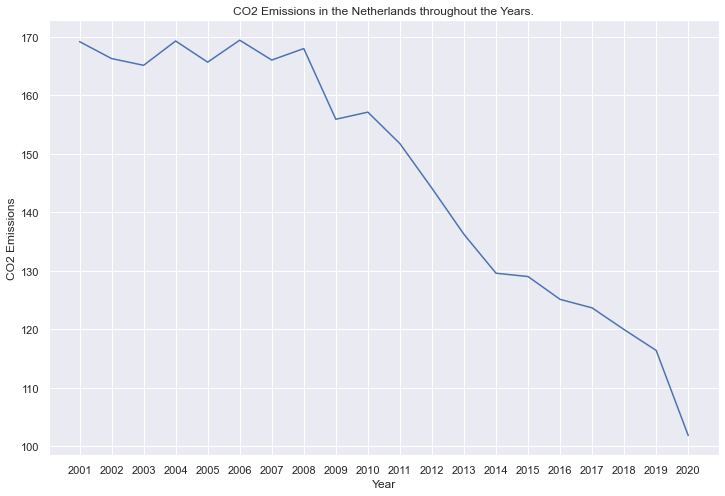

In [7]:
# Netherlands Data
sns.set(rc = {'figure.figsize':(12, 8)})
sns.lineplot(x='Year', y='CO2', data=netherlands_co2_data)
plt.title ('CO2 Emissions in the Netherlands throughout the Years.')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')

## Maastricht Data

**EDA:**

   - Remove Mistaken Values
   - Drop Irrelevant Columns
   - Merge the time data into a single column

In [8]:
# Load Data
maastricht_data = pd.read_csv('DATALOG.csv', low_memory=False)
maastricht_data.head()

,year,month,day,hour,min,sec,CO2,tvoc,pm2.5,pm10,temp,hum
0,2023,2,22,1,33,44,0,1,23,26,21,49
1,2023,2,22,1,33,49,10000,1,25,26,21,49
2,2023,2,22,1,33,53,10000,1,28,28,21,49
3,2023,2,22,1,33,58,1840,1,27,28,21,49
4,2023,2,22,1,34,3,1395,1,28,30,21,48


In [9]:
# Remove mistaken String values at index 141777
maastricht_data = maastricht_data.drop(axis=0, index=141777)

# Comvert String Values to Int
maastricht_data['year'] = maastricht_data['year'].astype('int')
maastricht_data['CO2'] = maastricht_data['CO2'].astype('int')
maastricht_data['hum'] = maastricht_data['hum'].astype('int')
maastricht_data['temp'] = maastricht_data['temp'].astype('int')
maastricht_data.head()

,year,month,day,hour,min,sec,CO2,tvoc,pm2.5,pm10,temp,hum
0,2023,2,22,1,33,44,0,1,23,26,21,49
1,2023,2,22,1,33,49,10000,1,25,26,21,49
2,2023,2,22,1,33,53,10000,1,28,28,21,49
3,2023,2,22,1,33,58,1840,1,27,28,21,49
4,2023,2,22,1,34,3,1395,1,28,30,21,48


In [10]:
# Drop irrelevant columns
maastricht_data = maastricht_data.drop(['hour', 'min', 'sec', 'tvoc', 'pm2.5', 'pm10'], axis=1)

# Merge Time Data into an other column of the DataFrame
maastricht_data['date'] = pd.to_datetime(maastricht_data[['year', 'month', 'day']])
maastricht_data = maastricht_data.drop(['year', 'month', 'day'], axis=1)
maastricht_data.head()

,CO2,temp,hum,date
0,0,21,49,2023-02-22
1,10000,21,49,2023-02-22
2,10000,21,49,2023-02-22
3,1840,21,49,2023-02-22
4,1395,21,48,2023-02-22


In [11]:
# Compute the mean of the observations of each day
maastricht_data = maastricht_data.groupby('date').agg({'CO2':'mean', 'temp':'mean', 'hum':'mean'})
maastricht_data.head()

,CO2,temp,hum
date,,,
2023-02-22,1182.346213,19.343079,51.507038
2023-02-23,984.114636,19.372314,52.694303
2023-02-24,949.361464,18.948604,49.578892
2023-02-25,778.136913,18.755953,44.932784
2023-02-26,819.894239,18.407717,39.028277


### Maastricht Data Plots

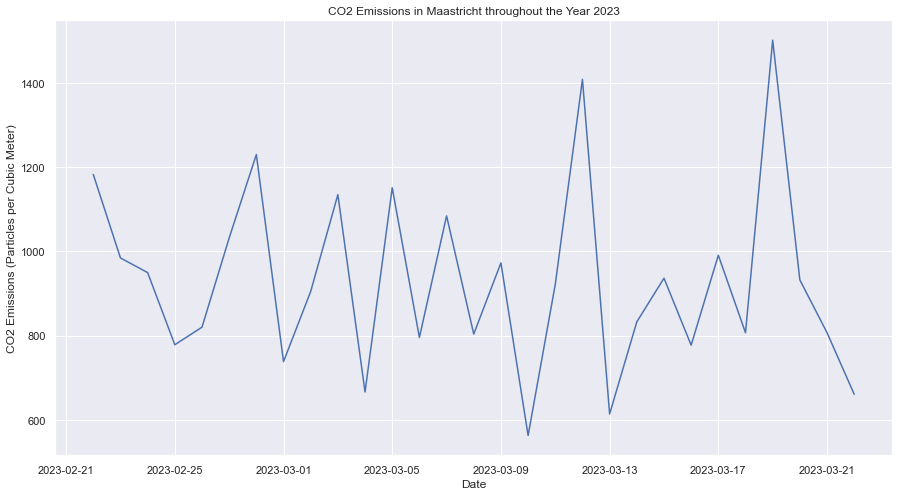

In [12]:
# Plot of CO2 Emissions in Maastricht thorughout two months (February and March 2023) 

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='date', y='CO2', data=maastricht_data)
plt.title ('CO2 Emissions in Maastricht throughout the Year 2023')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions (Particles per Cubic Meter)')
plt.savefig('maas_emiss.png')